In [ ]:
# Copyright 2019 NVIDIA Corporation. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<img src="http://developer.download.nvidia.com/compute/machine-learning/frameworks/nvidia_logo.png" style="width: 90px; float: right;">

# UNet Industrial Inference Demo

## Overview


In this notebook, we will demo the process of carrying out inference on new images using a trained UNet model. First, we clone the UNet_Industrial repository and set up the workspace.

In [6]:
!wget -nc -q --show-progress -O ./master.zip \
https://github.com/vinhngx/DeepLearningExamples/archive/master.zip
!unzip -q -n -d . ./master.zip 

./master.zip            [       <=>          ]  18.28M  11.9MB/s    in 1.5s    


In [10]:
!cd DeepLearningExamples-master; git checkout vinhn_unet_industrial_demo

M	TensorFlow/Segmentation/UNet_Industrial/notebooks/TensorFlow_UNet_Industrial_Colab_inference-demo.ipynb
M	TensorFlow/Segmentation/UNet_Industrial/notebooks/TensorFlow_UNet_Industrial_Colab_train_and_inference.ipynb
Already on 'vinhn_unet_industrial_demo'
Your branch is up-to-date with 'origin/vinhn_unet_industrial_demo'.


In [11]:
import os

WORKSPACE_DIR='./DeepLearningExamples-master/TensorFlow/Segmentation/UNet_Industrial/'
os.chdir(WORKSPACE_DIR)
print (os.getcwd())

/data/DeepLearningExamples/TensorFlow/Segmentation/UNet_Industrial/notebooks/DeepLearningExamples-master/TensorFlow/Segmentation/UNet_Industrial


## Data download

We will first download some data, in particular, the [Weakly Supervised Learning for Industrial Optical Inspection (DAGM 2007)](https://resources.mpi-inf.mpg.de/conference/dagm/2007/prizes.html) dataset. 

> The competition is inspired by problems from industrial image processing. In order to satisfy their customers' needs, companies have to guarantee the quality of their products, which can often be achieved only by inspection of the finished product. Automatic visual defect detection has the potential to reduce the cost of quality assurance significantly.
>
> The competitors have to design a stand-alone algorithm which is able to detect miscellaneous defects on various background textures.
>
> The particular challenge of this contest is that the algorithm must learn, without human intervention, to discern defects automatically from a weakly labeled (i.e., labels are not exact to the pixel level) training set, the exact characteristics of which are unknown at development time. During the competition, the programs have to be trained on new data without any human guidance.

**Source:** https://resources.mpi-inf.mpg.de/conference/dagm/2007/prizes.html


In [100]:
! ./download_and_preprocess_dagm2007_public.sh ./data


################################################
Processing Public Dataset
################################################

Archive:  /data/DeepLearningExamples/TensorFlow/Segmentation/UNet_Industrial/notebooks/data/zip_files/public/Class1.zip
Archive:  /data/DeepLearningExamples/TensorFlow/Segmentation/UNet_Industrial/notebooks/data/zip_files/public/Class1_def.zip
Archive:  /data/DeepLearningExamples/TensorFlow/Segmentation/UNet_Industrial/notebooks/data/zip_files/public/Class2.zip
Archive:  /data/DeepLearningExamples/TensorFlow/Segmentation/UNet_Industrial/notebooks/data/zip_files/public/Class2_def.zip
Archive:  /data/DeepLearningExamples/TensorFlow/Segmentation/UNet_Industrial/notebooks/data/zip_files/public/Class3.zip
Archive:  /data/DeepLearningExamples/TensorFlow/Segmentation/UNet_Industrial/notebooks/data/zip_files/public/Class3_def.zip
Archive:  /data/DeepLearningExamples/TensorFlow/Segmentation/UNet_Industrial/notebooks/data/zip_files/public/Class4.zip
Archive:  /data/DeepLe

The final data directory should look like:

```
./data
  raw_images
      public
          Class1	    
          Class2	
          Class3	    
          Class4	
          Class5	    
          Class6
          Class1_def  
          Class2_def	
          Class3_def  
          Class4_def	
          Class5_def  
          Class6_def
      private
  zip_files
```

## 3. Model download

NVIDIA provides pretrained UNet model at https://ngc.nvidia.com/catalog/models. Here, we will download and upzip pretrained UNet models. 

In [104]:
%%bash 
wget -nc -q --show-progress -O unet_model.zip \
https://api.ngc.nvidia.com/v2/models/nvidia/unetindustrial_for_tensorflow_32/versions/1/zip
unzip -o ./unet_model.zip

Archive:  ./unet_model.zip
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+1/checkpoint  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+1/graph.pbtxt  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+1/model.ckpt-2500.data-00000-of-00002  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+1/model.ckpt-2500.data-00001-of-00002  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+1/model.ckpt-2500.index  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+1/model.ckpt-2500.meta  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+10/checkpoint  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+10/graph.pbtxt  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+10/model.ckpt-2500.data-00000-of-00002  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+10/model.ckpt-2500.data-00001-of-00002  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Class+10/model.ckpt-2500.index  
  inflating: JoC_UNET_Industrial_FP32_TF_20190522/Cla


     0K .......... .......... .......... .......... ..........  0%  990K 4m35s
    50K .......... .......... .......... .......... ..........  0% 1.90M 3m27s
   100K .......... .......... .......... .......... ..........  0% 1.95M 3m3s
   150K .......... .......... .......... .......... ..........  0% 1.98M 2m51s
   200K .......... .......... .......... .......... ..........  0%  174M 2m17s
   250K .......... .......... .......... .......... ..........  0%  121M 1m55s
   300K .......... .......... .......... .......... ..........  0%  128M 99s
   350K .......... .......... .......... .......... ..........  0% 2.02M 1m43s
   400K .......... .......... .......... .......... ..........  0%  222M 91s
   450K .......... .......... .......... .......... ..........  0%  207M 82s
   500K .......... .......... .......... .......... ..........  0%  267M 75s
   550K .......... .......... .......... .......... ..........  0%  251M 69s
   600K .......... .......... .......... .......... ..........

Upon completion of the download, the following model directories should exist, containing pre-trained model corresponding to 10 classes of the DAGM 2007 competition data set.

In [107]:
!ls JoC_UNET_Industrial_FP16_TF_20190522

Class+1   Class+12  Class+3  Class+5  Class+7  Class+9
Class+10  Class+2   Class+4  Class+6  Class+8


## Inference with Naitive TensorFlow

We will now launch an interactive testing, where you can load new test images. First, we load some required libraries and define some helper functions to load images.

In [ ]:
import tensorflow as tf
print(tf.__version__)

import horovod.tensorflow
import sys
sys.path.insert(0,'..')

from model.unet import UNet_v1


In [109]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./data/raw_images/public/Class1_def/1.png')

#img = mpimg.imread('/CDR/DAGM10/raw_images/private/Class9/Test/0466.PNG')
#img = mpimg.imread('/CDR/DAGM10/raw_images/private/Class9/Test/0250.PNG')
#img = mpimg.imread('/CDR/DAGM10/raw_images/private/Class9/Test/0009.PNG')

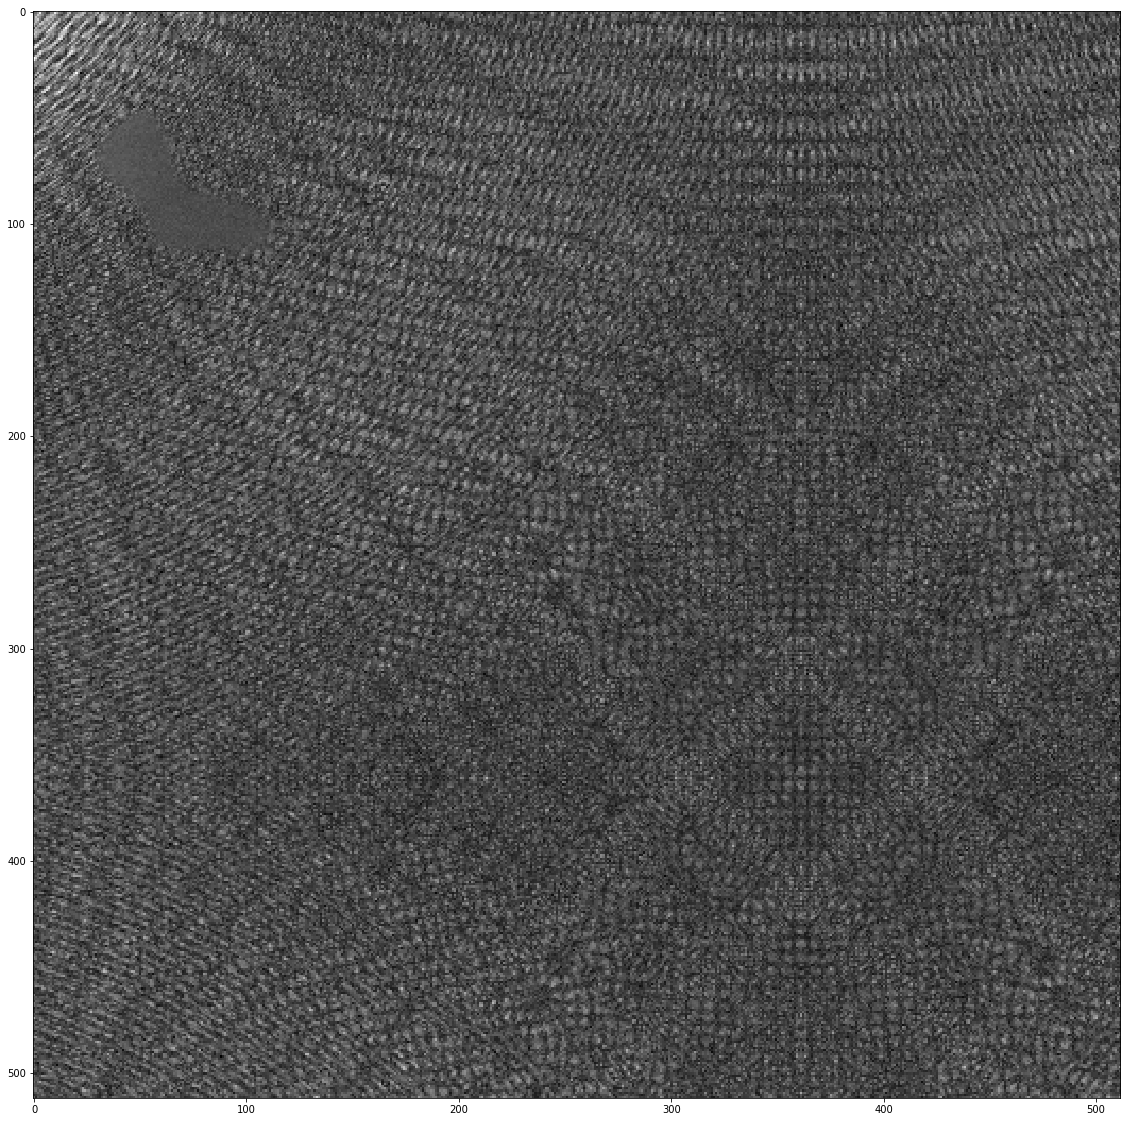

In [110]:
plt.figure(figsize = (20,20))
plt.imshow(img, cmap='gray')

In [111]:
img =  np.expand_dims(img, axis=2)
img =  np.expand_dims(img, axis=0)

In [112]:
img = (img-0.5)/0.5

In [115]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

graph = tf.Graph()
with graph.as_default():
    with tf.Session(config=config) as sess:
        network = UNet_v1(
            model_name="UNet_v1",
            input_format='NHWC',
            compute_format='NCHW',
            n_output_channels=1,
            unet_variant='tinyUNet',
            weight_init_method='he_uniform',
            activation_fn='relu'
        )
        
        tf_input = tf.placeholder(tf.float32, [None, 512, 512, 1], name='input')
        
        outputs, logits = network.build_model(tf_input)
        saver = tf.train.Saver()

        # Restore variables from disk.
        saver.restore(sess, "JoC_UNET_Industrial_FP32_TF_20190522/Class+1/model.ckpt-2500")
        
        
        output = sess.run([outputs, logits], feed_dict={tf_input: img})
        


[2019-09-26 02:52:46] Conv2D: `UNet_v1/input_block/conv2d/BiasAdd:0`
	[*] data_format: NCHW
	[*] dilation_rate: (1, 1)
	[*] kernel_size: (3, 3)
	[*] n_channels: 32
	[*] out_dtype: <dtype: 'float32'>
	[*] out_shape: (?, 32, 512, 512)
	[*] padding: same
	[*] strides: (1, 1)
	[*] trainable: True
	[*] use_bias: True

[2019-09-26 02:52:46] ReLU: `UNet_v1/input_block/act1/relu:0`
	[*] out_dtype: <dtype: 'float32'>
	[*] out_shape: (?, 32, 512, 512)

[2019-09-26 02:52:46] Conv2D: `UNet_v1/input_block/conv2d_1/BiasAdd:0`
	[*] data_format: NCHW
	[*] dilation_rate: (1, 1)
	[*] kernel_size: (3, 3)
	[*] n_channels: 32
	[*] out_dtype: <dtype: 'float32'>
	[*] out_shape: (?, 32, 512, 512)
	[*] padding: same
	[*] strides: (1, 1)
	[*] trainable: True
	[*] use_bias: True

[2019-09-26 02:52:46] ReLU: `UNet_v1/input_block/act2/relu:0`
	[*] out_dtype: <dtype: 'float32'>
	[*] out_shape: (?, 32, 512, 512)

[2019-09-26 02:52:47] MaxPooling2D: `UNet_v1/input_block/max_pooling2d/MaxPool:0`
	[*] data_format: NCHW

[2019-09-26 02:52:47] Conv2D: `UNet_v1/upsample_block_2/conv2d/BiasAdd:0`
	[*] data_format: NCHW
	[*] dilation_rate: (1, 1)
	[*] kernel_size: (3, 3)
	[*] n_channels: 64
	[*] out_dtype: <dtype: 'float32'>
	[*] out_shape: (?, 64, 128, 128)
	[*] padding: same
	[*] strides: (1, 1)
	[*] trainable: True
	[*] use_bias: True

[2019-09-26 02:52:47] ReLU: `UNet_v1/upsample_block_2/act1/relu:0`
	[*] out_dtype: <dtype: 'float32'>
	[*] out_shape: (?, 64, 128, 128)

[2019-09-26 02:52:47] Conv2D: `UNet_v1/upsample_block_2/conv2d_1/BiasAdd:0`
	[*] data_format: NCHW
	[*] dilation_rate: (1, 1)
	[*] kernel_size: (3, 3)
	[*] n_channels: 32.0
	[*] out_dtype: <dtype: 'float32'>
	[*] out_shape: (?, 32, 128, 128)
	[*] padding: same
	[*] strides: (1, 1)
	[*] trainable: True
	[*] use_bias: True

[2019-09-26 02:52:47] ReLU: `UNet_v1/upsample_block_2/act2/relu:0`
	[*] out_dtype: <dtype: 'float32'>
	[*] out_shape: (?, 32, 128, 128)

[2019-09-26 02:52:47] Upscale2D: `UNet_v1/upsample_block_2/deconv2d/transpose_1:0`

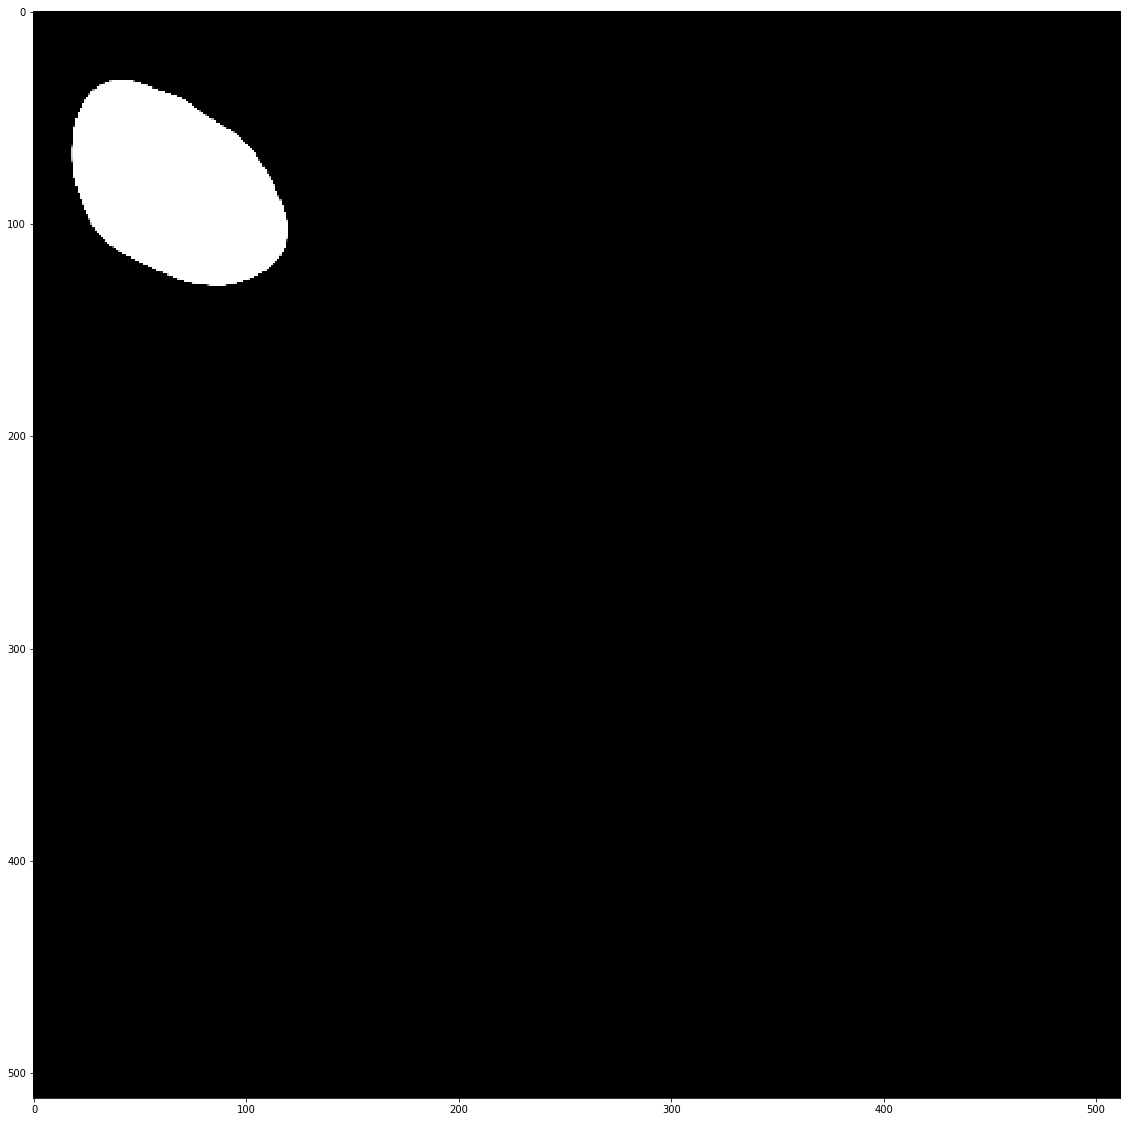

In [116]:
plt.figure(figsize = (20,20))
plt.imshow(np.squeeze(output[0]), cmap='gray')

# Optimize model and inference with TF-TRT

In this section, instead of doing inference with the naitive TensorFlow environment, we will first optimize the model with TF-TRT, the doing inference

In [117]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

config = tf.ConfigProto()
config.gpu_options.allow_growth=True

graph = tf.Graph()
with graph.as_default():
    with tf.Session(config=config) as sess:
        network = UNet_v1(
            model_name="UNet_v1",
            input_format='NHWC',
            compute_format='NCHW',
            n_output_channels=1,
            unet_variant='tinyUNet',
            weight_init_method='he_uniform',
            activation_fn='relu'
        )
        
        tf_input = tf.placeholder(tf.float32, [None, 512, 512, 1], name='input')
        
        outputs, logits = network.build_model(tf_input)
        saver = tf.train.Saver()

        # Restore variables from disk.
        saver.restore(sess, "JoC_UNET_Industrial_FP32_TF_20190522/Class+1/model.ckpt-2500")
        
        # Freeze the graph:
        frozen_graph = tf.graph_util.convert_variables_to_constants(sess,
                                                                    tf.get_default_graph().as_graph_def(),
                                                                    output_node_names=['outputs', 'logits'])

        # Now you can create a TensorRT inference graph from your frozen graph:
        converter = trt.TrtGraphConverter(input_graph_def=frozen_graph,
                                          nodes_blacklist=['logits', 'outputs']) #output nodes
        trt_graph = converter.convert()
    
        # Import the TensorRT graph into a new graph and run:
        output_node = tf.import_graph_def(trt_graph, return_elements=['logits', 'outputs'])
    
        output = sess.run([output_node], feed_dict={tf_input: img})
        

ImportError: No module named 'tensorflow.python.compiler'

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(np.squeeze(output[0]), cmap='gray')

# Conclusion

In this notebook, we have walked through the complete process of preparing the container and data required for training Mask-RCNN models. We have also investigated various training options, trained and tested Mask-RCNN models with various configurations.

## What's next
Now it's time to try the MaskR-CNN on your own data. Observe the performance impact of mixed precision training while comparing the final accuracy of the models trained with FP32 and mixed precision.
